<a href="https://colab.research.google.com/github/heitorabqg/datascientist/blob/master/PSI5892_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para abrir o notebook no Google Colab, altere o domínio `github.com` para `githubtocolab.com`

<div class="alert alert-block alert-danger">
Para praticar programação, é importante que você erre, leia as mensagens de erro e tente corrigí-los.
    
Dessa forma, no Google Colab, é importante que você DESATIVE OS RECURSOS DE AUTOCOMPLETAR:

- Menu Ferramentas -> Configurações
- Na janela que é aberta:
  - Seção Editor -> Desativar "Mostrar sugestões de preenchimento de código com base no contexto"
  - Seção Assistência de IA -> Desabilitar itens

Na versão em inglês:

- Menu Tools -> Settings
- Na janela que é aberta:
  - Seção Editor -> Desativar "Show context-powered code completions"
  - Seção AI Assistance -> Desabilitar itens
</div>

# PSI5892 - Aula de Exercícios

# Análise de componentes principais (PCA) e análise de discriminantes lineares (LDA)

Neste exercício, você vai trabalhar com uma aplicação de redes neurais para  para a área de saúde. O objetivo é obter um modelo de predição de uma doença cardíaca baseado em dados com características extraídas de exames clínicos laboratoriais.

## Dados disponibilizados

Os dados para treinamento e teste do modelo estão disponíveis no formato CSV, em um arquivo zip disponível [neste link](./data.zip).

Após extrair os arquivos, utiliza a biblioteca Pandas para carregar os `DataFrames` `data_train` e `data_test`, como mostrado a seguir:

``` python
import pandas as pd

data_train = pd.read_csv("data_train.csv").drop(columns=["Unnamed: 0"])

data_test = pd.read_csv("data_test.csv").drop(columns=["Unnamed: 0"])
```

Os dados consistem de 800 exemplos de treinamento e 225 para teste, cada um contendo 13 características de entrada, representadas pelas colunas de 0 a 12 e a saída desejada binária, indicando se o paciente é portador ou não da doença, representada pela coluna 13.

O objetivo é treinar uma rede neural com estes dados, avaliar o desempenho e depois comparar com o desempenho obtido usando o PCA para realizar redução de dimensionalidade. Use como referência o exemplo mostrado [neste Jupyter Notebook](./PCA_IRIS.ipynb)

# Exercício 1

Implemente uma rede neural para classificar se o indivíduo é portador ou não da doença cardíaca (coluna 13) usando como entrada os dados dos exames laboratoriais (colunas 1 a 12). Calcule a acurácia obtida nos dados de teste.

## Resolução

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# 1. Carregar os dados
data_train = pd.read_csv("data_train.csv").drop(columns=["Unnamed: 0"])
data_test  = pd.read_csv("data_test.csv").drop(columns=["Unnamed: 0"])

# 2. Separar X e y
X_train = data_train.iloc[:, 0:13].values
y_train = data_train.iloc[:, 13].values

X_test = data_test.iloc[:, 0:13].values
y_test = data_test.iloc[:, 13].values

# 3. Normalização
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Rede Neural
mlp = MLPClassifier(
    hidden_layer_sizes=(20, 10),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)

# 5. Avaliação
y_pred = mlp.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print("Acurácia no conjunto de teste:", accuracy)


Acurácia no conjunto de teste: 1.0


# Exercício 2

Aplique o PCA nos dados de entrada e obtenha uma matriz de dados transformados representando os 12 componentes principais. Mostre o valor da porcentagem de variância explicada acumulada à medida que você considera um maior número de componentes principais.

## Resolução

1 componentes: 22.07% da variância explicada
2 componentes: 33.49% da variância explicada
3 componentes: 42.89% da variância explicada
4 componentes: 52.00% da variância explicada
5 componentes: 59.85% da variância explicada
6 componentes: 67.39% da variância explicada
7 componentes: 74.05% da variância explicada
8 componentes: 79.92% da variância explicada
9 componentes: 85.39% da variância explicada
10 componentes: 90.01% da variância explicada
11 componentes: 93.94% da variância explicada
12 componentes: 97.20% da variância explicada


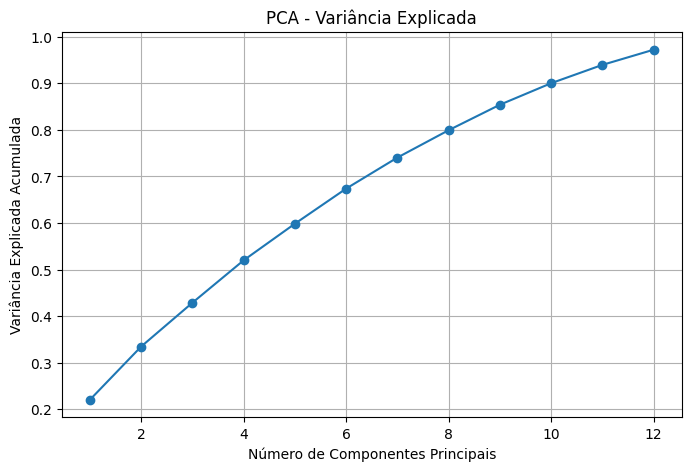

In [4]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=12)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

for i, cv in enumerate(cumulative_variance, start=1):
    print(f"{i} componentes: {cv*100:.2f}% da variância explicada")

plt.figure(figsize=(8,5))
plt.plot(np.arange(1,13), cumulative_variance, marker='o')
plt.xlabel("Número de Componentes Principais")
plt.ylabel("Variância Explicada Acumulada")
plt.title("PCA - Variância Explicada")
plt.grid(True)
plt.show()




# Exercício 3

Implemente uma segunda rede neural para fazer a classificação usando o número de componentes principais necessário para incluir 90% da variância explicada. Calcule a acurácia obtida nos dados de teste.

## Resolução

In [5]:
pca_full = PCA(n_components=13)
pca_full.fit(X_train_scaled)

explained = np.cumsum(pca_full.explained_variance_ratio_)


n_components_90 = np.argmax(explained >= 0.90) + 1
print("Número de componentes para atingir 90% da variância:", n_components_90)


pca = PCA(n_components=n_components_90)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


mlp_pca = MLPClassifier(
    hidden_layer_sizes=(20, 10),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)

mlp_pca.fit(X_train_pca, y_train)


y_pred_pca = mlp_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print("Acurácia no teste usando PCA (90% variância):", accuracy_pca)


Número de componentes para atingir 90% da variância: 10
Acurácia no teste usando PCA (90% variância): 0.9866666666666667


# Exercício 4

Repita os exercícios 1, 2 e 3, considerando a transformação dos dados usando o LDA no lugar do PCA. Use como referência o exemplo mostrado [neste Jupyter Notebook](./LDA_IRIS.ipynb)

## Resolução

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

mlp_orig = MLPClassifier(
    hidden_layer_sizes=(20,10),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)
mlp_orig.fit(X_train_scaled, y_train)

pred_orig = mlp_orig.predict(X_test_scaled)
acc_orig = accuracy_score(y_test, pred_orig)

print("Acurácia com dados originais:", acc_orig)


lda = LinearDiscriminantAnalysis(n_components=1)  # para 2 classes
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda  = lda.transform(X_test_scaled)



eigenvalues = lda.explained_variance_ratio_
print("Variância explicada pelo discriminante:", eigenvalues[0])


mlp_lda = MLPClassifier(
    hidden_layer_sizes=(10,),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)

mlp_lda.fit(X_train_lda, y_train)

pred_lda = mlp_lda.predict(X_test_lda)
acc_lda = accuracy_score(y_test, pred_lda)

print("Acurácia usando LDA:", acc_lda)




Acurácia com dados originais: 1.0
Variância explicada pelo discriminante: 1.0
Acurácia usando LDA: 0.7866666666666666
